In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model

In [20]:
forestfires = pd.read_csv('F:/Sampada/Sampada/Assignments/Neural Network/forestfires.csv')
forestfires.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


In [21]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [22]:
df=forestfires.iloc[:,0:11]
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [23]:
#Add a new column = size_category
df['size_category'] = np.where(df['area']>6, '1', '0')
df['size_category']= pd.to_numeric(df['size_category'])
df.tail(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
507,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,0
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,0
509,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,0
510,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,0
511,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00,0
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0


C:\Users\sonali jante\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot of weekend vs weekday')

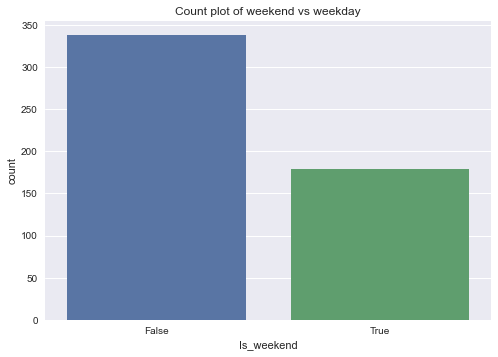

In [24]:
#separate day column into weekend ( True ) or not weekend ( False)
df['day'] = ((df['day'] == 'sun') | (df['day'] == 'sat'))
df = df.rename(columns = {'day' : 'Is_weekend'})
sns.countplot(df['Is_weekend'])
plt.title('Count plot of weekend vs weekday')

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

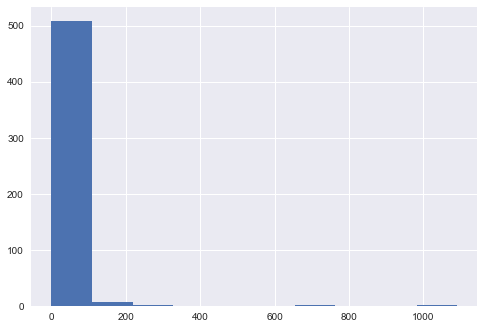

In [25]:
plt.hist(df['area'])

(array([512.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.  , 0.64, 1.28, 1.92, 2.56, 3.2 , 3.84, 4.48, 5.12, 5.76, 6.4 ]),
 <BarContainer object of 10 artists>)

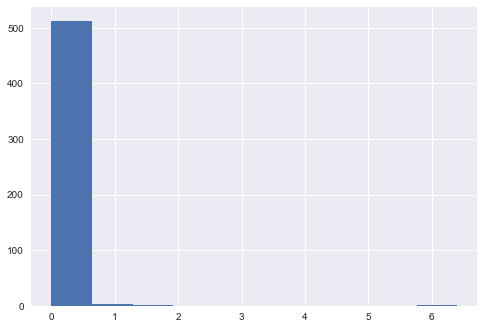

In [26]:
plt.hist(df['rain'])

The distributions of rain and areaare too skewed and have large outliers so we will scale it to even out the distribution.


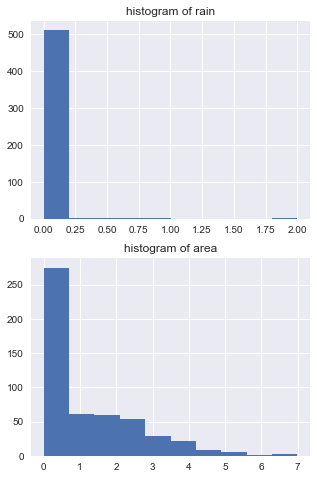

In [27]:
# natural logarithm scaling (+1 to prevent errors at 0)
df.loc[:, ['rain', 'area']] = df.loc[:, ['rain', 'area']].apply(lambda x: np.log(x + 1), axis = 1)

fig, ax = plt.subplots(2, figsize = (5, 8))
ax[0].hist(df['rain'])
ax[0].title.set_text('histogram of rain')
ax[1].hist(df['area'])
ax[1].title.set_text('histogram of area')

The distribution for rain is not good but the distribution for areais highly improved. Now we scale the entire dataset.

C:\Users\sonali jante\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot')

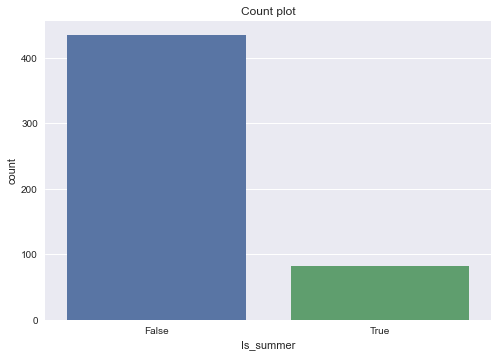

In [28]:
#labelencoder = LabelEncoder()
#df['month'] = labelencoder.fit_transform(df['month'])
df['month'] = ((df['month'] == 'mar') | (df['month'] == 'apr') | (df['month'] == 'may') | (df['month'] == 'jun'))
df = df.rename(columns = {'month' : 'Is_summer'})
sns.countplot(df['Is_summer'])
plt.title('Count plot')

In [29]:
#Train Test Split
features = df.drop(['size_category'], axis = 1)
labels = df['size_category'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size = 0.2, random_state = 42)

In [30]:
#Feature Scaling: StandardScaler
# fitting scaler
sc_features = StandardScaler()
# transforming features
X_test = sc_features.fit_transform(X_test)
X_train = sc_features.transform(X_train)
# features
X_test = pd.DataFrame(X_test, columns = features.columns)
X_train = pd.DataFrame(X_train, columns = features.columns)
# labels
y_test = pd.DataFrame(y_test, columns = ['size_category'])
y_train = pd.DataFrame(y_train, columns = ['size_category'])
X_train.head()

,Is_summer,Is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-0.472789,1.404076,0.342959,-0.060220,0.867158,-0.249015,0.784070,-1.071784,-0.054362,-0.137348,0.219260
1,-0.472789,-0.712212,-0.057456,0.370353,0.600021,-0.465731,-0.203920,-0.279375,-1.042369,-0.137348,0.177491
2,-0.472789,-0.712212,0.312158,0.834731,0.483714,0.664288,0.221938,0.248898,-0.054362,-0.137348,0.180797
3,-0.472789,-0.712212,1.544206,1.341810,0.537142,0.664288,2.283090,-1.071784,-1.042369,-0.137348,1.087255
4,-0.472789,1.404076,-1.320305,-1.602809,-2.022846,-0.945602,-1.106740,0.645102,-1.042369,-0.137348,0.578923


In [31]:
#Hyperparameter/ Experiment Results
#1) Experiment 1 : Base Model
#1 input layer 2 hidden layers 1 dropout layer 1 output layer
model = Sequential()
# input layer + 1st hidden layer
model.add(Dense(6, input_dim=11, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'relu'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 6)                 72        
                                                                 
 dense_41 (Dense)            (None, 6)                 42        
                                                                 
 dense_42 (Dense)            (None, 6)                 42        
                                                                 
 dropout_10 (Dropout)        (None, 6)                 0         
                                                                 
 dense_43 (Dense)            (None, 1)                 7         
                                                                 
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compile Model
model.compile(optimizer = 'adam', metrics=['accuracy'], loss ='binary_crossentropy')
# Train Model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 10, epochs = 100)

Epoch 1/100
42/42 [==============================] - 2s 11ms/step - loss: 3.3580 - accuracy: 0.7240 - val_loss: 3.9288 - val_accuracy: 0.7308
Epoch 2/100
42/42 [==============================] - 0s 4ms/step - loss: 3.3784 - accuracy: 0.7143 - val_loss: 4.0178 - val_accuracy: 0.7308
Epoch 3/100
42/42 [==============================] - 0s 4ms/step - loss: 3.3902 - accuracy: 0.6998 - val_loss: 3.9136 - val_accuracy: 0.7308
Epoch 4/100
42/42 [==============================] - 0s 4ms/step - loss: 3.2783 - accuracy: 0.7215 - val_loss: 3.8893 - val_accuracy: 0.7308
Epoch 5/100
42/42 [==============================] - 0s 4ms/step - loss: 3.1447 - accuracy: 0.7167 - val_loss: 3.8871 - val_accuracy: 0.7308
Epoch 6/100
42/42 [==============================] - 0s 4ms/step - loss: 3.1853 - accuracy: 0.6804 - val_loss: 3.8826 - val_accuracy: 0.7308
Epoch 7/100
42/42 [==============================] - 0s 4ms/step - loss: 3.3085 - accuracy: 0.6828 - val_loss: 3.8827 - val_accuracy: 0.7308
Epoch 8/100


Epoch 59/100
42/42 [==============================] - 0s 4ms/step - loss: 1.2587 - accuracy: 0.7288 - val_loss: 0.3645 - val_accuracy: 0.8269
Epoch 60/100
42/42 [==============================] - 0s 3ms/step - loss: 1.1740 - accuracy: 0.7966 - val_loss: 0.3641 - val_accuracy: 0.8269
Epoch 61/100
42/42 [==============================] - 0s 3ms/step - loss: 0.7208 - accuracy: 0.8305 - val_loss: 0.3668 - val_accuracy: 0.8365
Epoch 62/100
42/42 [==============================] - 0s 3ms/step - loss: 0.9892 - accuracy: 0.7772 - val_loss: 0.3588 - val_accuracy: 0.8462
Epoch 63/100
42/42 [==============================] - 0s 3ms/step - loss: 1.0155 - accuracy: 0.7869 - val_loss: 0.3448 - val_accuracy: 0.8462
Epoch 64/100
42/42 [==============================] - 0s 3ms/step - loss: 0.9919 - accuracy: 0.7869 - val_loss: 0.3411 - val_accuracy: 0.8462
Epoch 65/100
42/42 [==============================] - 0s 3ms/step - loss: 0.8611 - accuracy: 0.8111 - val_loss: 0.3389 - val_accuracy: 0.8462
Epoch 

In [33]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.937, Valid: 0.904


The accuracy score of the train data is 99% and the accuracy score of the valid/the test data is 96%.

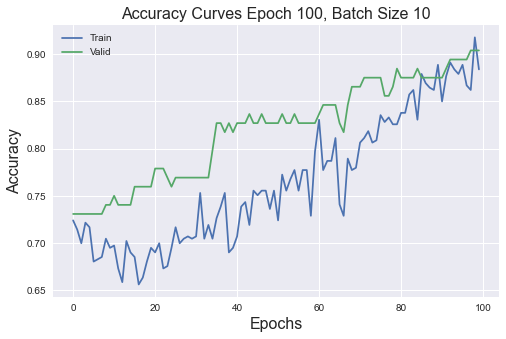

In [34]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves Epoch 100, Batch Size 10', fontsize=16)
plt.show()

Based on the output of the accuracy graph, the model begins to show the stability at epochs 60 to 100.

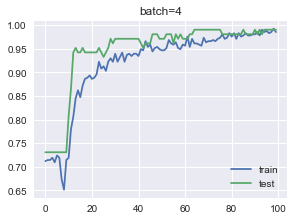

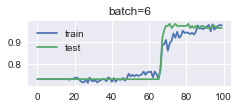

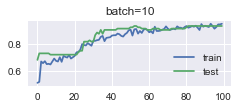

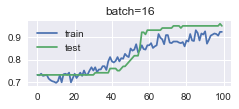

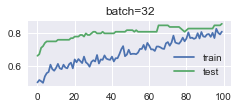

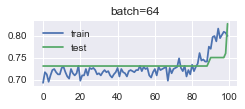

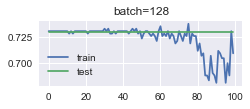

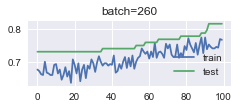

In [35]:
#2) Experiment 2: Batch Size: 4, 6, 10, 16, 32, 64, 128, 260

# Fit a model and plot learning curve
def fit_model(X_train, y_train, X_test, y_test, n_batch):
    # Define Model
    model = Sequential()
    model.add(Dense(6, input_dim=11, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(6, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'relu'))
    # Compile Model
    model.compile(optimizer = 'adam',
    metrics=['accuracy'],
    loss = 'binary_crossentropy')
    # Fit Model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0, batch_size=n_batch)
    # Plot Learning Curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch='+str(n_batch))
    plt.legend()
    
# Create learning curves for different batch sizes
batch_sizes = [4, 6, 10, 16, 32, 64, 128, 260]
plt.figure(figsize=(10,15))
for i in range(len(batch_sizes)):
    # Determine the Plot Number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    # Fit model and plot learning curves for a batch size
    fit_model(X_train, y_train, X_test, y_test, batch_sizes[i])
    # Show learning curves
    plt.show()

Based on the accuracy graph above, the model that is good enough to show stability is the model which batch = 6.

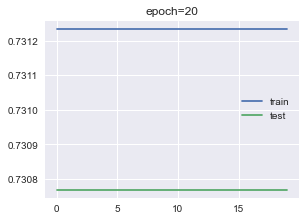

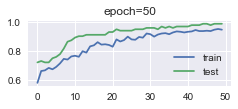

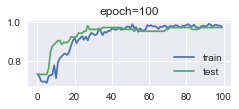

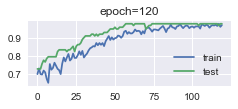

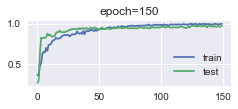

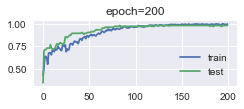

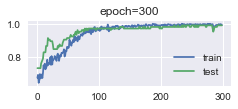

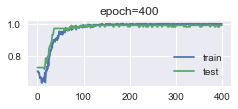

In [36]:
#3) Experiment 3: Batch Size = 6, Epochs = 20, 50, 100, 120, 150, 200, 300, 400

# fit a model and plot learning curve
def fit_model(trainX, trainy, validX, validy, n_epoch):
    # define model
    model = Sequential()
    model.add(Dense(6, input_dim=11, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(6, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'relu'))
    # compile model
    model.compile(optimizer ='adam', metrics=['accuracy'], loss = 'binary_crossentropy')
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=n_epoch, verbose=0, batch_size=6)
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('epoch='+str(n_epoch))
    plt.legend()
    
# Create learning curves for different batch sizes
epochs = [20, 50, 100, 120, 150, 200, 300, 400]
plt.figure(figsize=(10,15))
for i in range(len(batch_sizes)):
    # Determine the Plot Number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    # Fit model and plot learning curves for a batch size
    fit_model(X_train, y_train, X_test, y_test, epochs[i])
    # Show learning curves
    plt.show()

In [39]:
def init_model():
    model = Sequential()
    model.add(Dense(6, input_dim=11, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(6, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'relu'))
    model.compile(optimizer ='adam',
    metrics=['accuracy'],
    loss = 'binary_crossentropy')
    return model

model = init_model()
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=150)
# model checkpoint
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fitting model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=250, verbose=0, batch_size=6, callbacks=[es, mc])


Epoch 1: val_accuracy improved from -inf to 0.73077, saving model to best_model.h5

Epoch 2: val_accuracy did not improve from 0.73077

Epoch 3: val_accuracy did not improve from 0.73077

Epoch 4: val_accuracy did not improve from 0.73077

Epoch 5: val_accuracy did not improve from 0.73077

Epoch 6: val_accuracy improved from 0.73077 to 0.75962, saving model to best_model.h5

Epoch 7: val_accuracy improved from 0.75962 to 0.81731, saving model to best_model.h5

Epoch 8: val_accuracy improved from 0.81731 to 0.90385, saving model to best_model.h5

Epoch 9: val_accuracy improved from 0.90385 to 0.93269, saving model to best_model.h5

Epoch 10: val_accuracy did not improve from 0.93269

Epoch 11: val_accuracy did not improve from 0.93269

Epoch 12: val_accuracy improved from 0.93269 to 0.94231, saving model to best_model.h5

Epoch 13: val_accuracy did not improve from 0.94231

Epoch 14: val_accuracy did not improve from 0.94231

Epoch 15: val_accuracy did not improve from 0.94231

Epoch 


Epoch 151: val_accuracy did not improve from 0.95192

Epoch 152: val_accuracy did not improve from 0.95192

Epoch 153: val_accuracy did not improve from 0.95192

Epoch 154: val_accuracy did not improve from 0.95192

Epoch 155: val_accuracy did not improve from 0.95192

Epoch 156: val_accuracy did not improve from 0.95192

Epoch 157: val_accuracy did not improve from 0.95192

Epoch 158: val_accuracy did not improve from 0.95192

Epoch 159: val_accuracy did not improve from 0.95192

Epoch 160: val_accuracy did not improve from 0.95192

Epoch 161: val_accuracy did not improve from 0.95192

Epoch 162: val_accuracy did not improve from 0.95192

Epoch 163: val_accuracy did not improve from 0.95192

Epoch 164: val_accuracy did not improve from 0.95192

Epoch 165: val_accuracy did not improve from 0.95192

Epoch 166: val_accuracy did not improve from 0.95192

Epoch 167: val_accuracy did not improve from 0.95192

Epoch 168: val_accuracy did not improve from 0.95192

Epoch 169: val_accuracy did

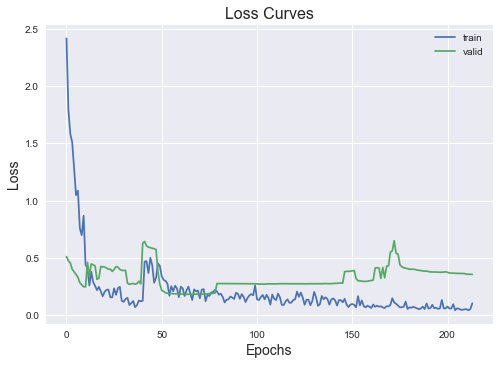

In [40]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss Curves', fontsize=16)
plt.show()

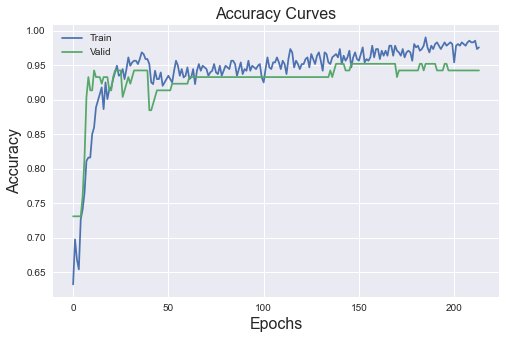

In [41]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()

In [42]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.990, Valid: 0.942
